# 빅뱅이론 데이터 분석

https://www.imdb.com/

#### 빅뱅이론 (The Big Bang Theory) 를 검색

>   - 해당 시즌, 상영일자를 조회하여 데이터를 분석
>   - 

#### 시각화에 필요한 데이터 
>   - 인덱스 : 시즌
>   - 열 : 연도,회차 수, 조회수 높은 회차 수 , 조회수 높은 비율 ,(평점 및 평균평점)
#### 그래프 ( 각 항목당 상위 5개 노출)
>   - 에피소드가 가장 많은 시즌은?
>   - 조회수가 높은 시즌은?
>   - 평점 높은 시즌은? 


## [1] 데이터 분석할 페이지로 이동과정

#### 0. 환경설정

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

options = webdriver.ChromeOptions()

prefs = {'download.default_directory' : '/home/hyeji/dev_ws/eda/data',
         'download.promt_for_download': False}
options.add_experimental_option('prefs',prefs)

url = "https://www.imdb.com/"
driver = webdriver.Chrome(service=Service("../driver/chromedriver-linux64/chromedriver"),
                          options=options)
driver.get(url)

In [12]:
driver.quit()

#### 1. 검색창 클릭 후 검색어 입력

//*[@id="suggestion-search"] <- 검색창 Xpath


In [2]:
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
search = driver.find_element(By.XPATH,'''//*[@id="suggestion-search"]''')
search.click()
search.send_keys("big bang theory")


In [3]:
driver.find_element(By.XPATH,'''//*[@id="react-autowhatever-navSuggestionSearch--item-0"]/a/div[2]/div[1]''').click()


In [236]:
#big_bang = driver.current_url

#### 2. 제목 클릭 

//*[@id="__next"]/main/div[2]/div[3]/section/div/div[1]/section[2]/div[2]/ul/li[1]/div[2]/div/a

#### 3. 특정 지점으로 스크롤
//*[@id="__next"]/main/div/section[1]/div/section/div/div[1]/section[2]/div[1]

맨 위로 스크롤

In [23]:
driver.execute_script("window.scrollTo(0, 0)")

In [4]:

epi_tab = driver.find_element(By.XPATH,'''//*[@id="__next"]/main/div/section[1]/div/section/div/div[1]/section[2]/div[1]''')
print(epi_tab.text)
driver.execute_script("arguments[0].scrollIntoView(false)", epi_tab)

Episodes
280


#### 4. 에피소드 탭으로 이동 

In [5]:
epi_butn = epi_tab.find_element(By.CLASS_NAME,"ipc-title-link-wrapper")
epi_butn.click()

## [2] 데이터 상세 분석 시작 !

#### 1. 고정으로 사용할 부분 지정

In [6]:
current_page = driver.current_url

In [7]:
episode = driver.find_element(By.XPATH,'''//*[@id="__next"]/main/div/section/div/section/div/div[1]/section[2]''')

In [8]:
category = episode.find_element(By.XPATH, '''//*[@id="__next"]/main/div/section/div/section/div/div[1]/section[2]/section[1]/div[1]''')
category_list = category.find_elements(By.TAG_NAME, "a")
for i in range(len(category_list)):
    print(str(i)+" ----- "+category_list[i].text)

0 ----- Seasons
1 ----- Years
2 ----- Top-rated


In [9]:
category_list[0].click()

#### 2. 시즌정보 가져오기 

In [10]:
season_list = []
num_info = episode.find_element(By.XPATH, '''//*[@id="__next"]/main/div/section/div/section/div/div[1]/section[2]/section[1]/div[2]/ul''')
info_list = num_info.find_elements(By.TAG_NAME, "a")
for i in range(len(info_list)):
    #print(str(i)+" ----- "+info_list[i].text)
    season_list.append(info_list[i].text)
season_list



['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 'Unknown']

#### 3. 시즌별 회차 제목 가져오기

In [11]:
import time
title_list = []
epi_len = []
for i in range(len(info_list)-1):
    info_list[i+1].click()
    time.sleep(0.5)
    title = episode.find_elements(By.CLASS_NAME,"ipc-title__text")
    time.sleep(0.5)
    epi_len.append(len(title))
    for t in title:
        title_list.append(t.text)
len(info_list), len(epi_len), len(title_list)

StaleElementReferenceException: Message: stale element reference: stale element not found
  (Session info: chrome=122.0.6261.94); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#stale-element-reference-exception
Stacktrace:
#0 0x55ae646b9e93 <unknown>
#1 0x55ae643b1ce6 <unknown>
#2 0x55ae643b70bc <unknown>
#3 0x55ae643b8e4b <unknown>
#4 0x55ae643b8eec <unknown>
#5 0x55ae643f7322 <unknown>
#6 0x55ae6441eeb2 <unknown>
#7 0x55ae643f16b8 <unknown>
#8 0x55ae6441f07e <unknown>
#9 0x55ae6443d899 <unknown>
#10 0x55ae6441ec53 <unknown>
#11 0x55ae643efdb3 <unknown>
#12 0x55ae643f077e <unknown>
#13 0x55ae6467f7cb <unknown>
#14 0x55ae646837e5 <unknown>
#15 0x55ae6466d0e1 <unknown>
#16 0x55ae64684372 <unknown>
#17 0x55ae646511bf <unknown>
#18 0x55ae646a8488 <unknown>
#19 0x55ae646a8683 <unknown>
#20 0x55ae646b9044 <unknown>
#21 0x7fbbf4c94ac3 <unknown>


In [31]:
s1_list=[]
time.sleep(0.5)
title_s1 = episode.find_elements(By.CLASS_NAME,"ipc-title__text")
time.sleep(0.5)
for t in title_s1:
    s1_list.append(t.text)
len_s1 = len(title_s1)

s1_list , len_s1

(['S1.E1 ∙ Pilot',
  'S1.E2 ∙ The Big Bran Hypothesis',
  'S1.E3 ∙ The Fuzzy Boots Corollary',
  'S1.E4 ∙ The Luminous Fish Effect',
  'S1.E5 ∙ The Hamburger Postulate',
  'S1.E6 ∙ The Middle Earth Paradigm',
  'S1.E7 ∙ The Dumpling Paradox',
  'S1.E8 ∙ The Grasshopper Experiment',
  'S1.E9 ∙ The Cooper-Hofstadter Polarization',
  'S1.E10 ∙ The Loobenfeld Decay',
  'S1.E11 ∙ The Pancake Batter Anomaly',
  'S1.E12 ∙ The Jerusalem Duality',
  'S1.E13 ∙ The Bat Jar Conjecture',
  'S1.E14 ∙ The Nerdvana Annihilation',
  'S1.E15 ∙ The Pork Chop Indeterminacy',
  'S1.E16 ∙ The Peanut Reaction',
  'S1.E17 ∙ The Tangerine Factor'],
 17)

In [16]:
title_list

[]

In [136]:
title_list_final = s1_list + title_list
len(title_list_final)

280

In [137]:
epi_len.insert(0,len_s1)
epi_len

[17, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 1]

In [130]:
#시즌별 에피소드 수 
for title in title_list:
        print(title)

S2.E1 ∙ The Bad Fish Paradigm
S2.E2 ∙ The Codpiece Topology
S2.E3 ∙ The Barbarian Sublimation
S2.E4 ∙ The Griffin Equivalency
S2.E5 ∙ The Euclid Alternative
S2.E6 ∙ The Cooper-Nowitzki Theorem
S2.E7 ∙ The Panty Piñata Polarization
S2.E8 ∙ The Lizard-Spock Expansion
S2.E9 ∙ The White Asparagus Triangulation
S2.E10 ∙ The Vartabedian Conundrum
S2.E11 ∙ The Bath Item Gift Hypothesis
S2.E12 ∙ The Killer Robot Instability
S2.E13 ∙ The Friendship Algorithm
S2.E14 ∙ The Financial Permeability
S2.E15 ∙ The Maternal Capacitance
S2.E16 ∙ The Cushion Saturation
S2.E17 ∙ The Terminator Decoupling
S2.E18 ∙ The Work Song Nanocluster
S2.E19 ∙ The Dead Hooker Juxtaposition
S2.E20 ∙ The Hofstadter Isotope
S2.E21 ∙ The Vegas Renormalization
S2.E22 ∙ The Classified Materials Turbulence
S2.E23 ∙ The Monopolar Expedition
S3.E1 ∙ The Electric Can Opener Fluctuation
S3.E2 ∙ The Jiminy Conjecture
S3.E3 ∙ The Gothowitz Deviation
S3.E4 ∙ The Pirate Solution
S3.E5 ∙ The Creepy Candy Coating Corollary
S3.E6 ∙ The 

In [131]:
for title in title_list:
        print(title.split(' '))
print(len(title_list))

['S2.E1', '∙', 'The', 'Bad', 'Fish', 'Paradigm']
['S2.E2', '∙', 'The', 'Codpiece', 'Topology']
['S2.E3', '∙', 'The', 'Barbarian', 'Sublimation']
['S2.E4', '∙', 'The', 'Griffin', 'Equivalency']
['S2.E5', '∙', 'The', 'Euclid', 'Alternative']
['S2.E6', '∙', 'The', 'Cooper-Nowitzki', 'Theorem']
['S2.E7', '∙', 'The', 'Panty', 'Piñata', 'Polarization']
['S2.E8', '∙', 'The', 'Lizard-Spock', 'Expansion']
['S2.E9', '∙', 'The', 'White', 'Asparagus', 'Triangulation']
['S2.E10', '∙', 'The', 'Vartabedian', 'Conundrum']
['S2.E11', '∙', 'The', 'Bath', 'Item', 'Gift', 'Hypothesis']
['S2.E12', '∙', 'The', 'Killer', 'Robot', 'Instability']
['S2.E13', '∙', 'The', 'Friendship', 'Algorithm']
['S2.E14', '∙', 'The', 'Financial', 'Permeability']
['S2.E15', '∙', 'The', 'Maternal', 'Capacitance']
['S2.E16', '∙', 'The', 'Cushion', 'Saturation']
['S2.E17', '∙', 'The', 'Terminator', 'Decoupling']
['S2.E18', '∙', 'The', 'Work', 'Song', 'Nanocluster']
['S2.E19', '∙', 'The', 'Dead', 'Hooker', 'Juxtaposition']
['S2.E2

In [51]:
rate_list = episode.find_elements(By.CLASS_NAME,"ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating")
print(len(rate_list))
for rate in rate_list:
    print(rate.text)

0


In [140]:
year_info = episode.find_element(By.XPATH, '''//*[@id="__next"]/main/div/section/div/section/div/div[1]/section[2]/section[1]/div[2]/ul''')
info_year = year_info.find_elements(By.TAG_NAME, "a")
for i in range(len(info_year)):
    print(str(i)+" ----- "+info_year[i].text)


0 ----- 2006
1 ----- 2007
2 ----- 2008
3 ----- 2009
4 ----- 2010
5 ----- 2011
6 ----- 2012
7 ----- 2013
8 ----- 2014
9 ----- 2015
10 ----- 2016
11 ----- 2017
12 ----- 2018
13 ----- 2019


#### 숫자바가 시즌,연도,조회수 순 모두 같은 Xpath라는 점 발견 !

//*[@id="__next"]/main/div/section/div/section/div/div[1]/section[2]/section[1]/div[2]/ul


//*[@id="__next"]/main/div/section/div/section/div/div[1]/section[2]/section[1]/div[2]/ul

#### 4. 평점 탭에서 시즌 정보 가져오기 

일단 평점 탭으로 이동

In [73]:
category_list[2].click()

In [76]:
test_data=[]
rate_title = episode.find_elements(By.CLASS_NAME,"ipc-title__text")
for t in rate_title:
    test_data.append(t.text.split("∙")[1:])
test_data

[[' S12.E24 ', ' The Stockholm Syndrome'],
 [' S2.E11 ', ' The Bath Item Gift Hypothesis'],
 [' S9.E11 ', ' The Opening Night Excitation'],
 [' S3.E22 ', ' The Staircase Implementation'],
 [' S12.E23 ', ' The Change Constant'],
 [' S11.E24 ', ' The Bow Tie Asymmetry'],
 [' S3.E8 ', ' The Adhesive Duck Deficiency'],
 [' S2.E15 ', ' The Maternal Capacitance'],
 [' S7.E9 ', ' The Thanksgiving Decoupling'],
 [' S2.E3 ', ' The Barbarian Sublimation']]

시즌 정보 추출

In [91]:
top_ss = [data[0].split('.')[0] for data in test_data]
#top_epi = [data[0].split('.')[1] for data in test_data]
top_ss

[' S12', ' S2', ' S9', ' S3', ' S12', ' S11', ' S3', ' S2', ' S7', ' S2']

In [155]:
ss = [' S12', ' S2', ' S9', ' S3', ' S12', ' S11', ' S3', ' S2', ' S7', ' S2']
ss_dic = {'S{}'.format(i): 0 for i in range(1, 13)}

for element in ss:
    key = element.strip()  # 공백 제거 후 키 값 설정
    ss_dic[key] += 1

print(ss_dic)


{'S1': 0, 'S2': 3, 'S3': 2, 'S4': 0, 'S5': 0, 'S6': 0, 'S7': 1, 'S8': 0, 'S9': 1, 'S10': 0, 'S11': 1, 'S12': 2}


In [158]:
top_ss = list(ss_dic.values())
top_ss.append(0)
top_ss

[0, 3, 2, 0, 0, 0, 1, 0, 1, 0, 1, 2, 0]

제목 정보 추출

In [79]:
top_rate_title = [data[-1] for data in test_data]
top_rate_title

[' The Stockholm Syndrome',
 ' The Bath Item Gift Hypothesis',
 ' The Opening Night Excitation',
 ' The Staircase Implementation',
 ' The Change Constant',
 ' The Bow Tie Asymmetry',
 ' The Adhesive Duck Deficiency',
 ' The Maternal Capacitance',
 ' The Thanksgiving Decoupling',
 ' The Barbarian Sublimation']

## 조회수를 가져오자

#### 전체 회차에서 가져오기 

In [250]:
import time
view_list=[]

for i in range(len(info_list)-1):
    info_list[i+1].click()
    time.sleep(0.5)
    view = episode.find_elements(By.CLASS_NAME,"ipc-rating-star--voteCount")
    time.sleep(0.5)

    for v in view:
        view_list.append(v.text)
        time.sleep(0.5)

view_list, len(view_list)

ElementClickInterceptedException: Message: element click intercepted: Element <a class="ipc-tab ipc-tab-link ipc-tab--on-base ipc-tab--active" role="tab" tabindex="0" aria-disabled="false" data-testid="tab-season-entry" href="/title/tt0898...66/episodes/?season=2">2</a> is not clickable at point (96, 699). Other element would receive the click: <ul class="ipc-tabs ipc-tabs--base ipc-tabs--align-left" role="tablist">...</ul>
  (Session info: chrome=122.0.6261.94)
Stacktrace:
#0 0x555f34bc5793 <unknown>
#1 0x555f348b91c6 <unknown>
#2 0x555f3490af93 <unknown>
#3 0x555f34908ea5 <unknown>
#4 0x555f34906877 <unknown>
#5 0x555f349056e8 <unknown>
#6 0x555f348f9247 <unknown>
#7 0x555f349263d2 <unknown>
#8 0x555f348f8bd8 <unknown>
#9 0x555f3492659e <unknown>
#10 0x555f34944dd9 <unknown>
#11 0x555f34926173 <unknown>
#12 0x555f348f72d3 <unknown>
#13 0x555f348f7c9e <unknown>
#14 0x555f34b898cb <unknown>
#15 0x555f34b8d745 <unknown>
#16 0x555f34b762e1 <unknown>
#17 0x555f34b8e2d2 <unknown>
#18 0x555f34b5a17f <unknown>
#19 0x555f34bb3dc8 <unknown>
#20 0x555f34bb3fc3 <unknown>
#21 0x555f34bc4944 <unknown>
#22 0x7f2467494ac3 <unknown>


In [18]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import time
import time

view_list = []

for i in range(len(info_list)-1):
    driver.execute_script("arguments[0].click();", info_list[i+1])
    time.sleep(0.5)
    view = driver.find_elements(By.CLASS_NAME, "ipc-rating-star--voteCount")
    time.sleep(0.5)

    for v in view:
        view_list.append(v.text)
        time.sleep(0.5)

view_list, len(view_list)


StaleElementReferenceException: Message: stale element reference: stale element not found
  (Session info: chrome=122.0.6261.94); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#stale-element-reference-exception
Stacktrace:
#0 0x56015024c793 <unknown>
#1 0x56014ff401c6 <unknown>
#2 0x56014ff4559c <unknown>
#3 0x56014ff4732b <unknown>
#4 0x56014ff473cc <unknown>
#5 0x56014ff85832 <unknown>
#6 0x56014ffad3d2 <unknown>
#7 0x56014ff7fbd8 <unknown>
#8 0x56014ffad59e <unknown>
#9 0x56014ffcbdd9 <unknown>
#10 0x56014ffad173 <unknown>
#11 0x56014ff7e2d3 <unknown>
#12 0x56014ff7ec9e <unknown>
#13 0x5601502108cb <unknown>
#14 0x560150214745 <unknown>
#15 0x5601501fd2e1 <unknown>
#16 0x5601502152d2 <unknown>
#17 0x5601501e117f <unknown>
#18 0x56015023adc8 <unknown>
#19 0x56015023afc3 <unknown>
#20 0x56015024b944 <unknown>
#21 0x7fa852694ac3 <unknown>


#### 보기 좋은 실수 타입으로 변환

In [246]:
view_list

[]

In [245]:
info_list[0].click()

평점 탭에서 조회수 정보 가져오기 

In [174]:
view_data = []
view = episode.find_elements(By.CLASS_NAME,"ipc-rating-star--voteCount")
for v in view:
    view_data.append(v.text)
view_data

[' (4.6K)',
 ' (4.3K)',
 ' (5K)',
 ' (4.3K)',
 ' (4.4K)',
 ' (4.5K)',
 ' (4.7K)',
 ' (4.2K)',
 ' (4.2K)',
 ' (4.1K)',
 ' (6.9K)',
 ' (4.2K)',
 ' (4.1K)',
 ' (4.1K)',
 ' (4.9K)',
 ' (4.1K)',
 ' (4.5K)',
 ' (4.1K)',
 ' (4.2K)',
 ' (4K)',
 ' (4.3K)',
 ' (4K)',
 ' (4.1K)']

In [206]:
view_data = [v.replace('(','').replace('.','').replace('K)','') for v in view_data]
view_data

[' 46',
 ' 43',
 ' 5',
 ' 43',
 ' 44',
 ' 45',
 ' 47',
 ' 42',
 ' 42',
 ' 41',
 ' 69',
 ' 42',
 ' 41',
 ' 41',
 ' 49',
 ' 41',
 ' 45',
 ' 41',
 ' 42',
 ' 4',
 ' 43',
 ' 4',
 ' 41']

## [3] 시각화

In [138]:
import pandas as pd
import numpy as np

/tmp/ipykernel_3968/2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [159]:
simple_result = pd.DataFrame({'Seasons': season_list,
                              "episode":epi_len,
                              "Top-rated" : top_ss})
simple_result.set_index('Seasons',inplace=True)
simple_result

,episode,Top-rated
Seasons,,
1,17,0
2,23,3
3,23,2
4,24,0
5,24,0
6,24,0
7,24,1
8,24,0
9,24,1


In [142]:
len(info_list), len(info_year), len(epi_len)

(13, 14, 13)

앗 !!! 2018년에 시즌 11,12 가 동시에 시작했네 ...저런 ~

In [162]:
df_sorted = simple_result.sort_values(by="Top-rated",ascending=False)
df_sorted = df_sorted.head(5)
df_sorted

,episode,Top-rated
Seasons,,
2,23,3
3,23,2
12,24,2
7,24,1
9,24,1


/tmp/ipykernel_3968/3617088561.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (simple_result.index[i], simple_result['Top-rated'][i]))


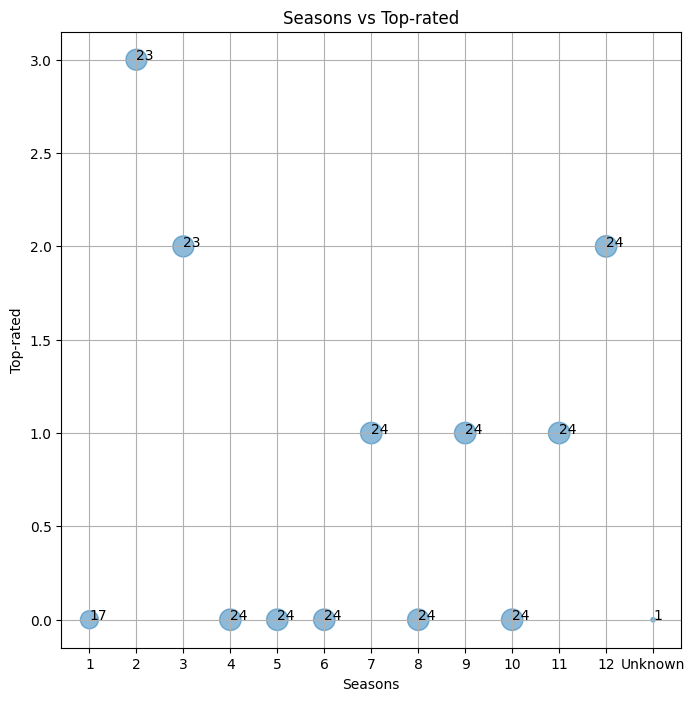

In [166]:
import matplotlib.pyplot as plt
import pandas as pd

# 산점도 그래프 그리기
plt.figure(figsize=(8, 8))
plt.scatter(simple_result.index, simple_result['Top-rated'], s=simple_result['episode']*10, alpha=0.5)

# 그래프에 주석 추가
for i, txt in enumerate(simple_result['episode']):
    plt.annotate(txt, (simple_result.index[i], simple_result['Top-rated'][i]))

# 그래프 제목과 축 레이블 추가
plt.title('Seasons vs Top-rated')
plt.xlabel('Seasons')
plt.ylabel('Top-rated')

# 그래프 표시
plt.grid(True)
plt.show()

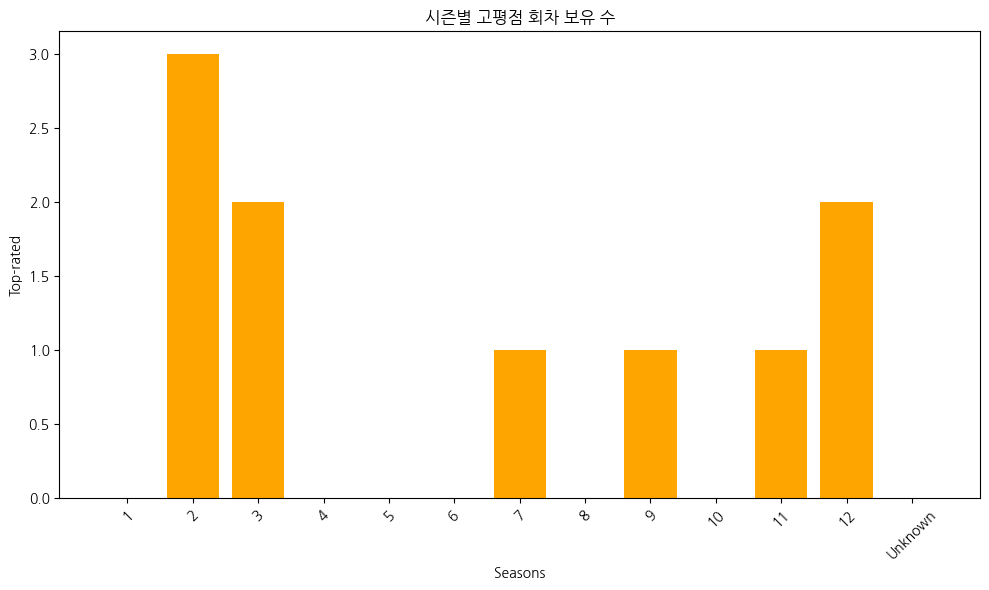

In [169]:
import koreanize_matplotlib
# 막대그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(simple_result.index, simple_result['Top-rated'], color='orange')

# 그래프 제목과 축 레이블 추가
plt.title('시즌별 고평점 회차 보유 수')
plt.xlabel('Seasons')
plt.ylabel('Top-rated')

# 그래프 표시
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()